In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import imutils

def haarcascade(img):
    # load trained mobilenetmodel
    model = load_model("mobilenetmodel.keras") 
    emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

    
    detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    
    image = cv2.imread(img) 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = detector.detectMultiScale(gray, scaleFactor=1.1, minNeighbors =5,minSize=(30,30),flags=cv2.CASCADE_SCALE_IMAGE)
    # minNeighbors reduces false positive
    for (x, y, w, h) in faces:
        # Draw rectangle around face
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        
        face_crop = image[y:y+h, x:x+w]
        face_resized = cv2.resize(face_crop, (224, 224))  # MobileNet input
        face_input = np.expand_dims(face_resized, axis=0) / 255.0  

        # Predict emotion
        predictions = model.predict(face_input)
        emotion = emotion_labels[np.argmax(predictions)]
        accuracy= float(predictions[0][np.argmax(predictions)])*100

        text = f"{emotion} ({accuracy:.2f}%)"

        # Put label above the rectangle
        cv2.putText(image, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    k
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


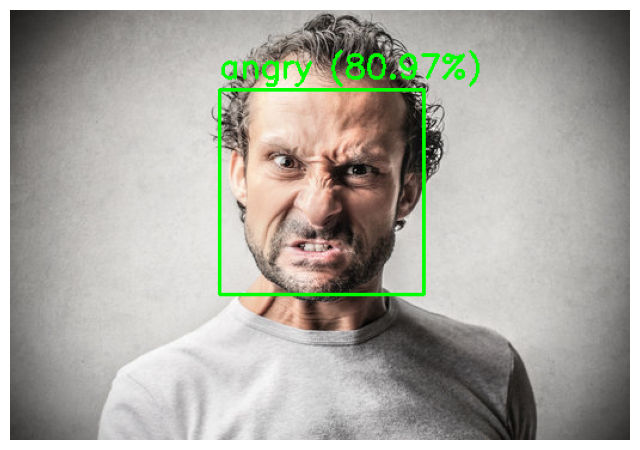

In [88]:
haarcascade('1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


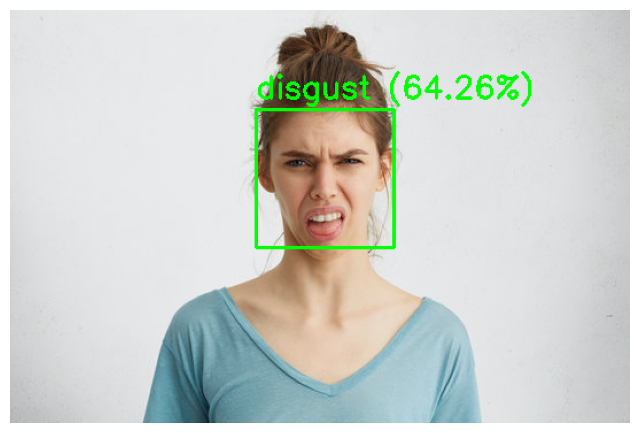

In [83]:
haarcascade('4.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


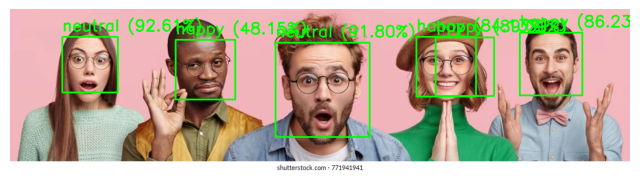

In [84]:
haarcascade('5.webp')